<a href="https://colab.research.google.com/github/RaveEx12/InternCareer/blob/main/Titanic_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.6 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, classification_report, roc_auc_score,roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from xgboost.sklearn import XGBClassifier
from catboost import CatBoostClassifier, Pool
from sklearn.ensemble import AdaBoostClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from collections import Counter
import scipy.stats


import warnings
warnings.filterwarnings("ignore")

#**Data Management**

In [93]:
test_directory = '/content/test.csv'
train_directory = '/content/train (1).csv'

train_dataset = pd.read_csv(train_directory)
test_dataset = pd.read_csv(test_directory)


In [4]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##**Descriptive statistics**

In [6]:
train_dataset.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,891.0,NaN,NaN,NaN,446.0,257.353842,1.0,223.5,446.0,668.5,891.0
Survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
Name,891,891,"Braund, Mr. Owen Harris",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
SibSp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
Parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
Ticket,891,681,347082,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


###**PassangerID:** The feature ranges from 1-891 Indicating a Unique identifyer for each passager
###**Survived:** This feature is a binary variable(0, 1) which indiacted wheather a passager survived or Not. Here, Approximately 38% of the passagers survived while 62% did Not!
###**Pclass:** Represents the passager's class (1,2,3); we say.

*   Economy class
*   Business class

*   First class (most passangers falls in this class)

###**Sex:** (male & female) 577 passengers are male while 314 are female passangers.
###**Age:** Age range from 0.42 to 80 years; 5months old babies were included in the ship and the average age of passagers is approximately 30years of age.







In [7]:
train_dataset.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#**Data Visualization**

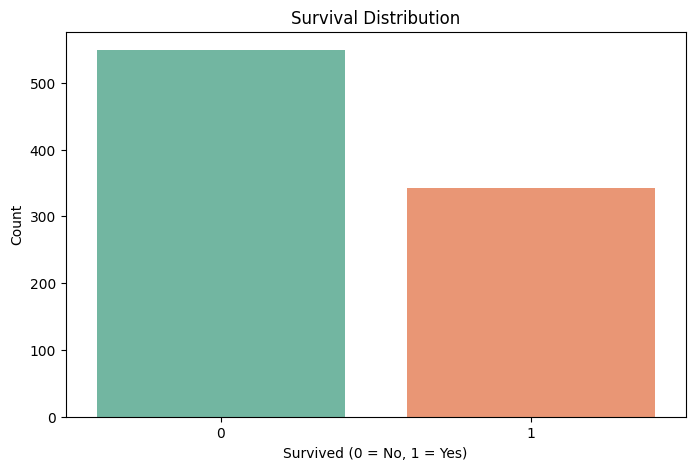

In [8]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Survived', data=train_dataset, palette="Set2")
plt.title('Survival Distribution')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

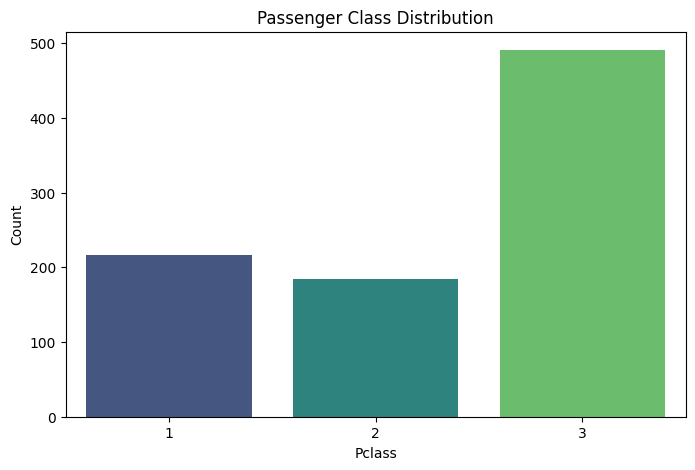

In [9]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Pclass', data=train_dataset, palette="viridis")
plt.title('Passenger Class Distribution')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.show()

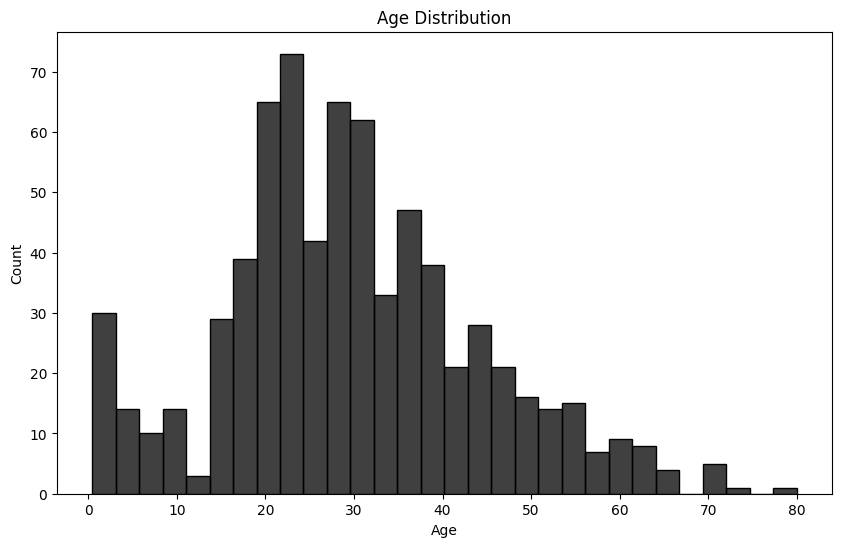

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(train_dataset['Age'].dropna(), bins=30, kde=False, color='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

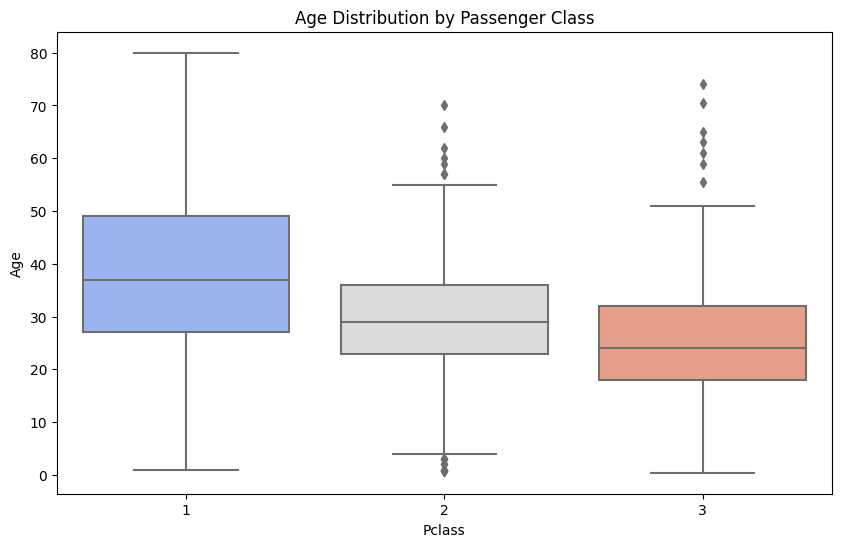

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Age', data=train_dataset, palette="coolwarm")
plt.title('Age Distribution by Passenger Class')
plt.xlabel('Pclass')
plt.ylabel('Age')
plt.show()

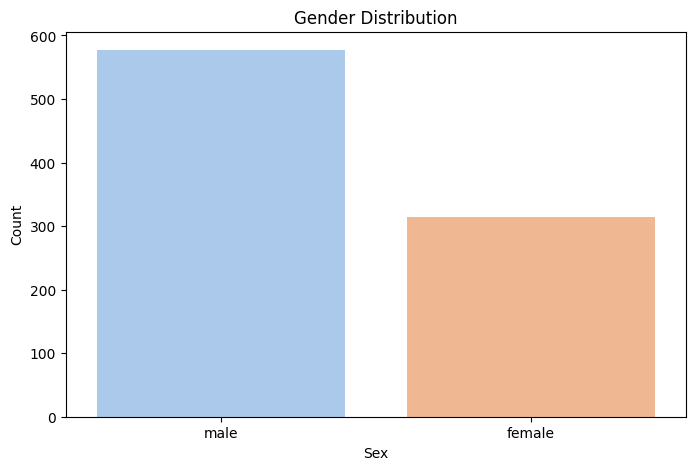

In [12]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Sex', data=train_dataset, palette="pastel")
plt.title('Gender Distribution')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

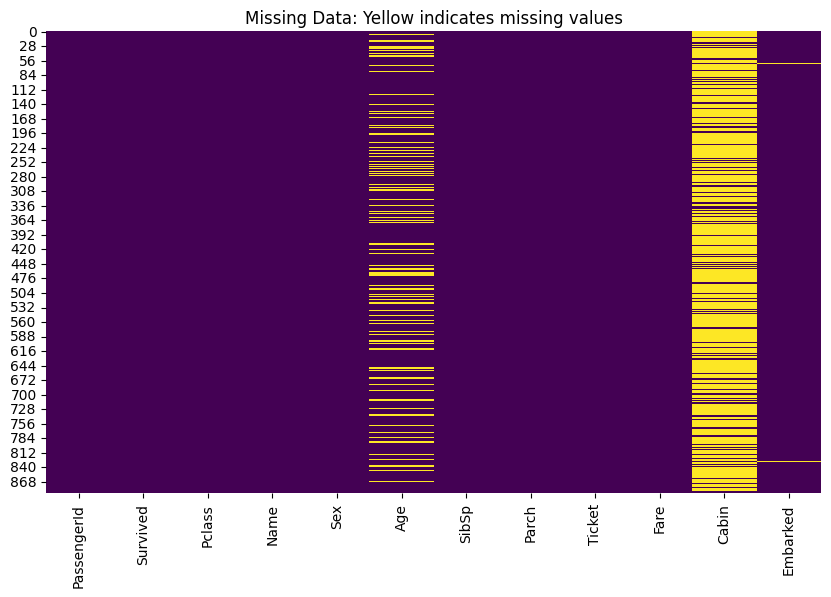

In [13]:
plt.figure(figsize=(10, 6))
sns.heatmap(train_dataset.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data: Yellow indicates missing values')
plt.show()

#**Data Preprocessing**

##**Missing Values**

In [14]:
if 'Cabin' in train_dataset.columns:
    train_dataset = train_dataset.drop('Cabin', axis=1)

In [15]:
len(train_dataset.columns)

11

In [16]:
mean_age = np.mean(train_dataset['Age'])

train_dataset.fillna(mean_age, inplace=True)

###**Checking for Label Imbalance**

Axes(0.125,0.11;0.775x0.77)


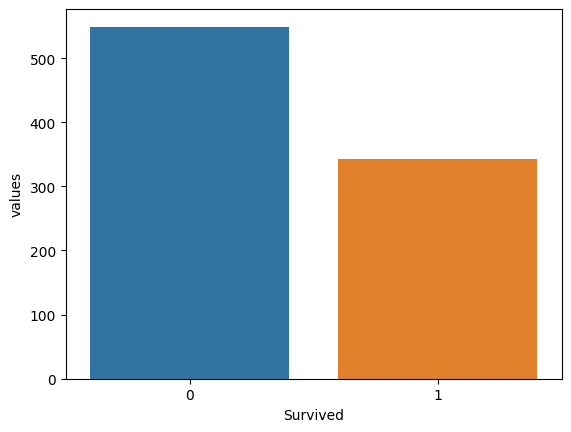

In [17]:
temp = train_dataset['Survived'].value_counts()
temp_df = pd.DataFrame({'Survived':temp.index, 'values':temp.values})
print(sns.barplot(x='Survived', y='values', data=temp_df))

In [18]:
train_dataset.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

##**Feature Engineering and Extraction**

In [19]:
train_dataset['FamilySize'] = train_dataset['SibSp'] + train_dataset['Parch']

train_dataset['IsAlone'] = (train_dataset['FamilySize'] == 1).astype(int)

Age_bracket = [0, 18, 35, 50, 100]
labels = ['child', 'youth', 'Adult', 'old']
train_dataset['AgeGroup'] = pd.cut(train_dataset['Age'], bins=Age_bracket, labels=labels)

# train_dataset['IndividualFare'] = train_dataset['Fare'] / train_dataset['FamilySize']

###**Dealing with dummies and dropping irrelevant features**

In [20]:
irrev_features = train_dataset.columns[~train_dataset.columns.isin(['Ticket', 'Name', 'PassengerId'])]
train_dataset = train_dataset.drop(['Ticket', 'Name', 'PassengerId'], axis=1)

In [21]:
train_dataset.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'FamilySize', 'IsAlone', 'AgeGroup'],
      dtype='object')

In [22]:
data_preprocessed = pd.get_dummies(train_dataset, drop_first= True)

In [23]:
data_preprocessed.head(n=3)

,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize,IsAlone,Sex_male,Embarked_C,Embarked_Q,Embarked_S,AgeGroup_youth,AgeGroup_Adult,AgeGroup_old
0,0,3,22.0,1,0,7.2500,1,1,1,0,0,1,1,0,0
1,1,1,38.0,1,0,71.2833,1,1,0,1,0,0,0,1,0
2,1,3,26.0,0,0,7.9250,0,0,0,0,0,1,1,0,0


In [24]:
for i in data_preprocessed.columns:
    print("**************************************",i,"***************************************")
    print()
    print(set(data_preprocessed[i].tolist()))
    print()

************************************** Survived ***************************************

{0, 1}

************************************** Pclass ***************************************

{1, 2, 3}

************************************** Age ***************************************

{0.75, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.69911764705882, 29.0, 31.0, 28.5, 32.0, 34.0, 35.0, 30.0, 33.0, 38.0, 39.0, 40.0, 37.0, 42.0, 36.5, 40.5, 45.0, 46.0, 47.0, 44.0, 49.0, 50.0, 51.0, 52.0, 45.5, 54.0, 55.0, 55.5, 56.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 70.5, 71.0, 14.5, 70.0, 74.0, 80.0, 20.5, 23.5, 24.5, 0.42, 30.5, 32.5, 34.5, 36.0, 41.0, 43.0, 48.0, 0.83, 0.92, 0.67, 53.0, 57.0}

************************************** SibSp ***************************************

{0, 1, 2, 3, 4, 5, 8}

************************************** Parch ***************************

In [25]:
data_preprocessed.isnull().sum()

Survived          0
Pclass            0
Age               0
SibSp             0
Parch             0
Fare              0
FamilySize        0
IsAlone           0
Sex_male          0
Embarked_C        0
Embarked_Q        0
Embarked_S        0
AgeGroup_youth    0
AgeGroup_Adult    0
AgeGroup_old      0
dtype: int64

In [26]:
params = data_preprocessed.columns
print(params)

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize',
       'IsAlone', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'AgeGroup_youth', 'AgeGroup_Adult', 'AgeGroup_old'],
      dtype='object')


In [27]:
# IndFare_mean = np.mean(data_preprocessed['IndividualFare'])

# data_preprocessed.fillna(IndFare_mean, inplace=True)

In [28]:
data_preprocessed.dtypes

Survived            int64
Pclass              int64
Age               float64
SibSp               int64
Parch               int64
Fare              float64
FamilySize          int64
IsAlone             int64
Sex_male            uint8
Embarked_C          uint8
Embarked_Q          uint8
Embarked_S          uint8
AgeGroup_youth      uint8
AgeGroup_Adult      uint8
AgeGroup_old        uint8
dtype: object

In [29]:
columns_to_convert = [
    'Sex_male',
    'Embarked_C',
    'Embarked_Q',
    'Embarked_S',
    'AgeGroup_youth',
    'AgeGroup_Adult',
    'AgeGroup_old'
]

data_preprocessed[columns_to_convert] = data_preprocessed[columns_to_convert].astype('float64')

In [30]:
#covering cleaned data to CSV
data_preprocessed.to_csv('TitanicDataPreprocessed')

###**Distribution plot**

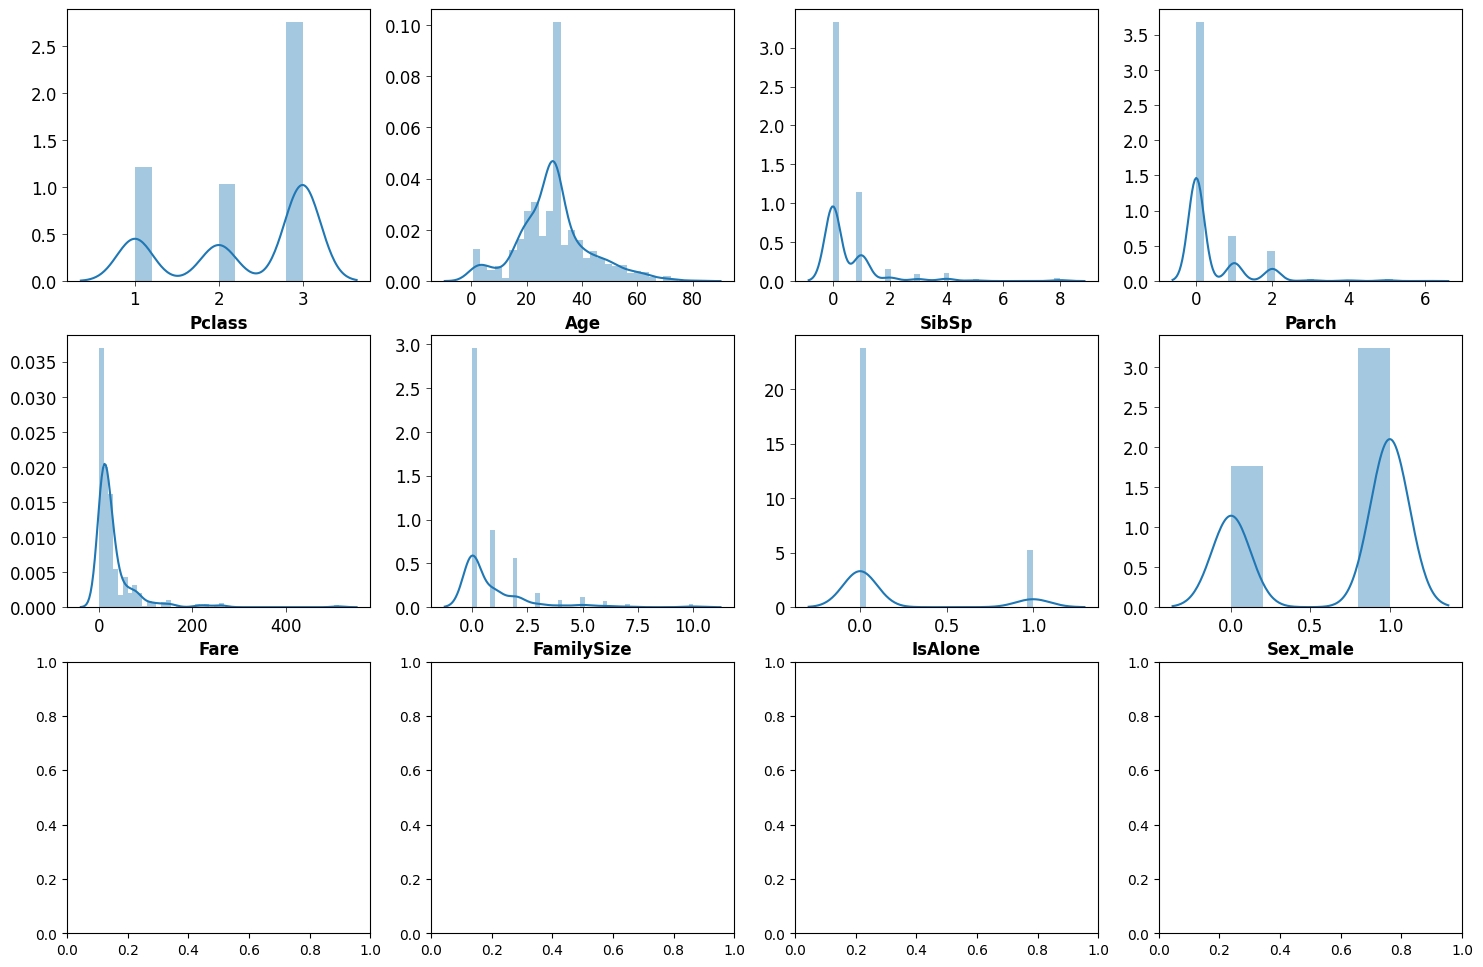

In [31]:
ncols = 4
nrows = 3

fig, axes = plt.subplots(nrows, ncols, figsize=(18, 12))
for r in range(nrows-1):
    for c in range(ncols):
        col=params[r*ncols+c +1]
        sns.distplot(x=data_preprocessed[col], ax=axes[r, c])
        axes[r, c].set_ylabel('')
        axes[r, c].set_xlabel(col, fontsize=12, fontweight='bold')
        axes[r, c].tick_params(labelsize=12, width=0.5)
        axes[r, c].xaxis.offsetText.set_fontsize(12)
        axes[r, c].yaxis.offsetText.set_fontsize(12)

plt.show()

###**Whisker's plot**

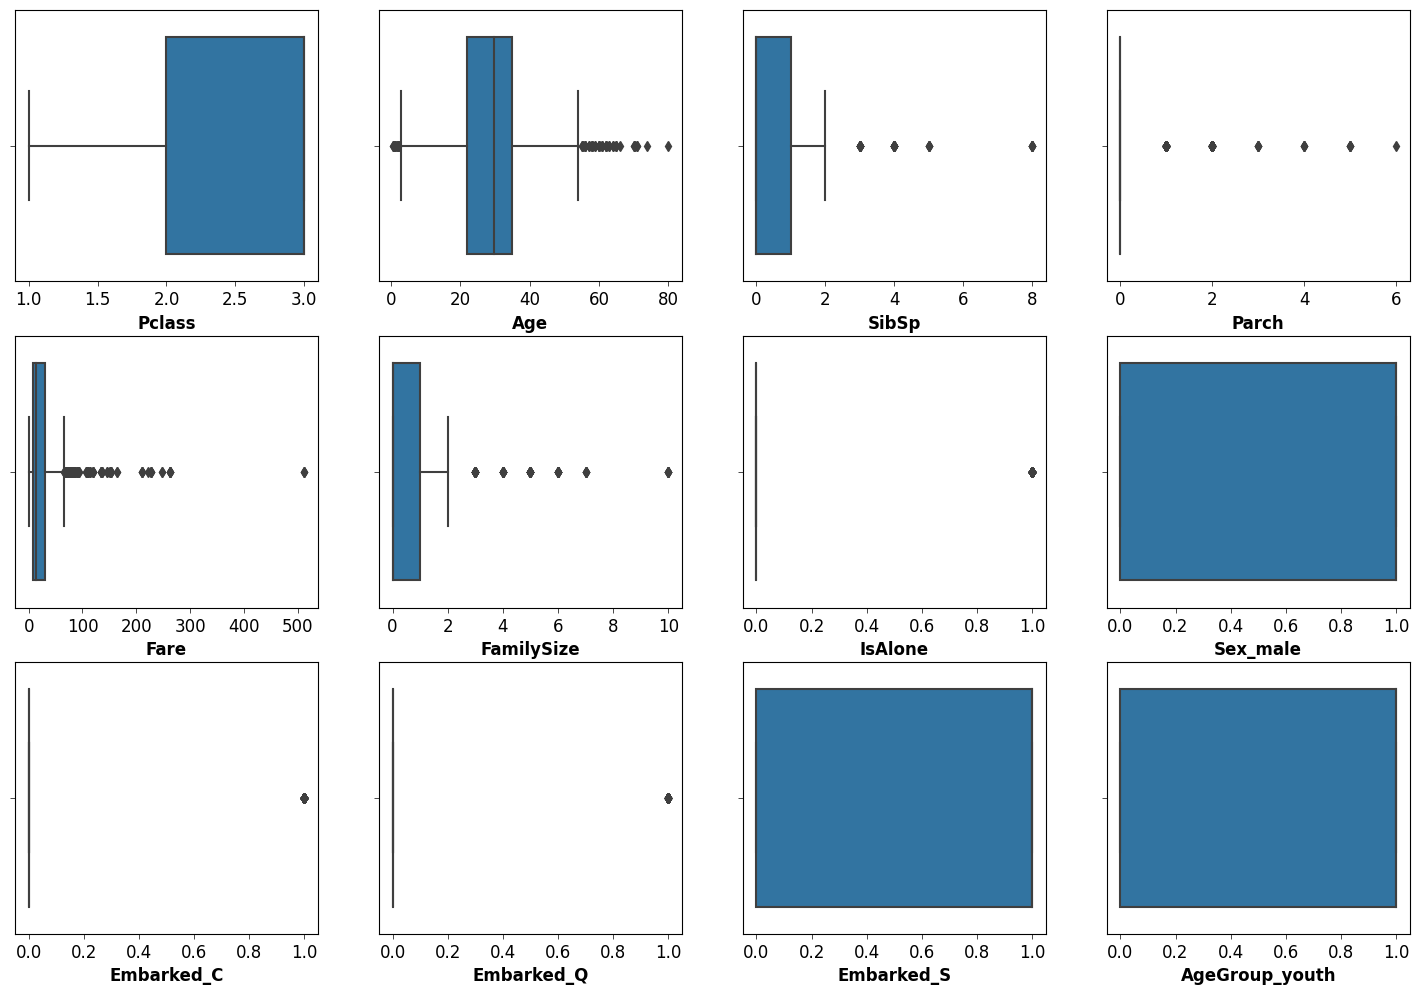

In [32]:
ncols = 4
nrows = 3

fig, axes = plt.subplots(nrows, ncols, figsize=(18, 12))
for r in range(nrows):
    for c in range(ncols):
        col=params[r*ncols+c +1]
        sns.boxplot(x=data_preprocessed[col], ax=axes[r, c])
        axes[r, c].set_ylabel('')
        axes[r, c].set_xlabel(col, fontsize=12, fontweight='bold')
        axes[r, c].tick_params(labelsize=12, width=0.5)
        axes[r, c].xaxis.offsetText.set_fontsize(12)
        axes[r, c].yaxis.offsetText.set_fontsize(12)

plt.show()

###*Dealing with Outliers*

In [33]:
q = data_preprocessed['SibSp'].quantile(97/100)
x_1 = data_preprocessed[data_preprocessed['SibSp'] < q]

<Axes: xlabel='SibSp', ylabel='Density'>

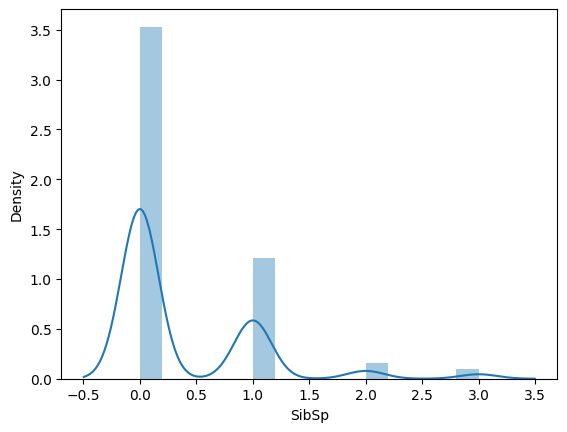

In [34]:
sns.distplot(x_1['SibSp'])

In [35]:
q = x_1['Parch'].quantile(99/100)
x_2 = x_1[x_1['Parch'] < q]

<Axes: xlabel='Parch', ylabel='Density'>

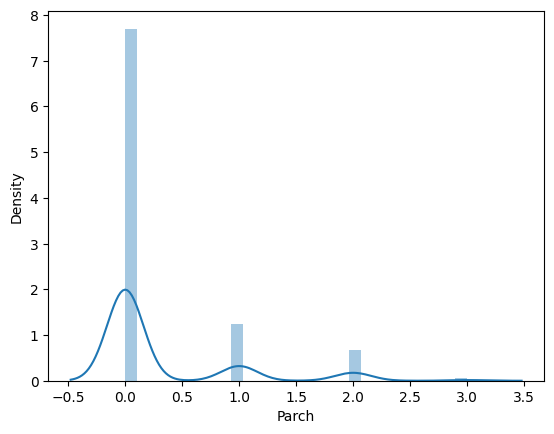

In [36]:
sns.distplot(x_2['Parch'])

In [37]:
q = x_2['FamilySize'].quantile(95/100)
x_3 = x_2[x_2['FamilySize'] < q]

<Axes: xlabel='FamilySize', ylabel='Density'>

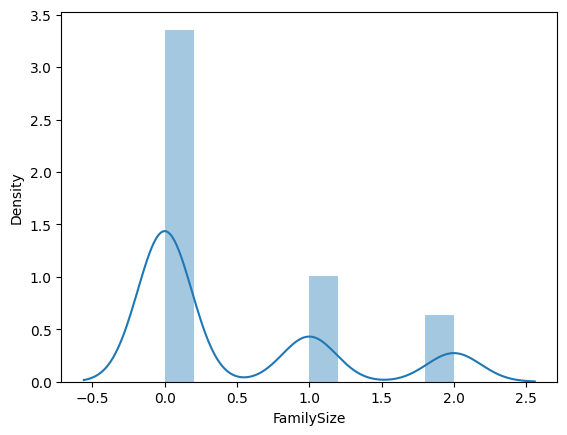

In [38]:
sns.distplot(x_3['FamilySize'])

In [39]:
# q = x_3['IndividualFare'].quantile(0.01)
# x_4 = x_3[x_3['IndividualFare'] > q]

In [40]:
# sns.distplot(x_4['IndividualFare'])

In [41]:
data_cleaned = x_3.reset_index(drop=True)
data_cleaned.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize,IsAlone,Sex_male,Embarked_C,Embarked_Q,Embarked_S,AgeGroup_youth,AgeGroup_Adult,AgeGroup_old
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,0.388750,2.281250,30.840507,0.265000,0.191250,29.361140,0.456250,0.201250,0.672500,0.198750,0.090000,0.708750,0.630000,0.175000,0.07750
std,0.487771,0.842933,12.280676,0.484839,0.476925,47.214302,0.709729,0.401185,0.469595,0.399309,0.286361,0.454623,0.483106,0.380205,0.26755
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,1.000000,24.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,0.000000,3.000000,29.699118,0.000000,0.000000,13.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.00000
75%,1.000000,3.000000,36.000000,0.000000,0.000000,26.662500,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.00000
max,1.000000,3.000000,80.000000,2.000000,2.000000,512.329200,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


###**Correlation plot of the Dataset**

<Axes: >

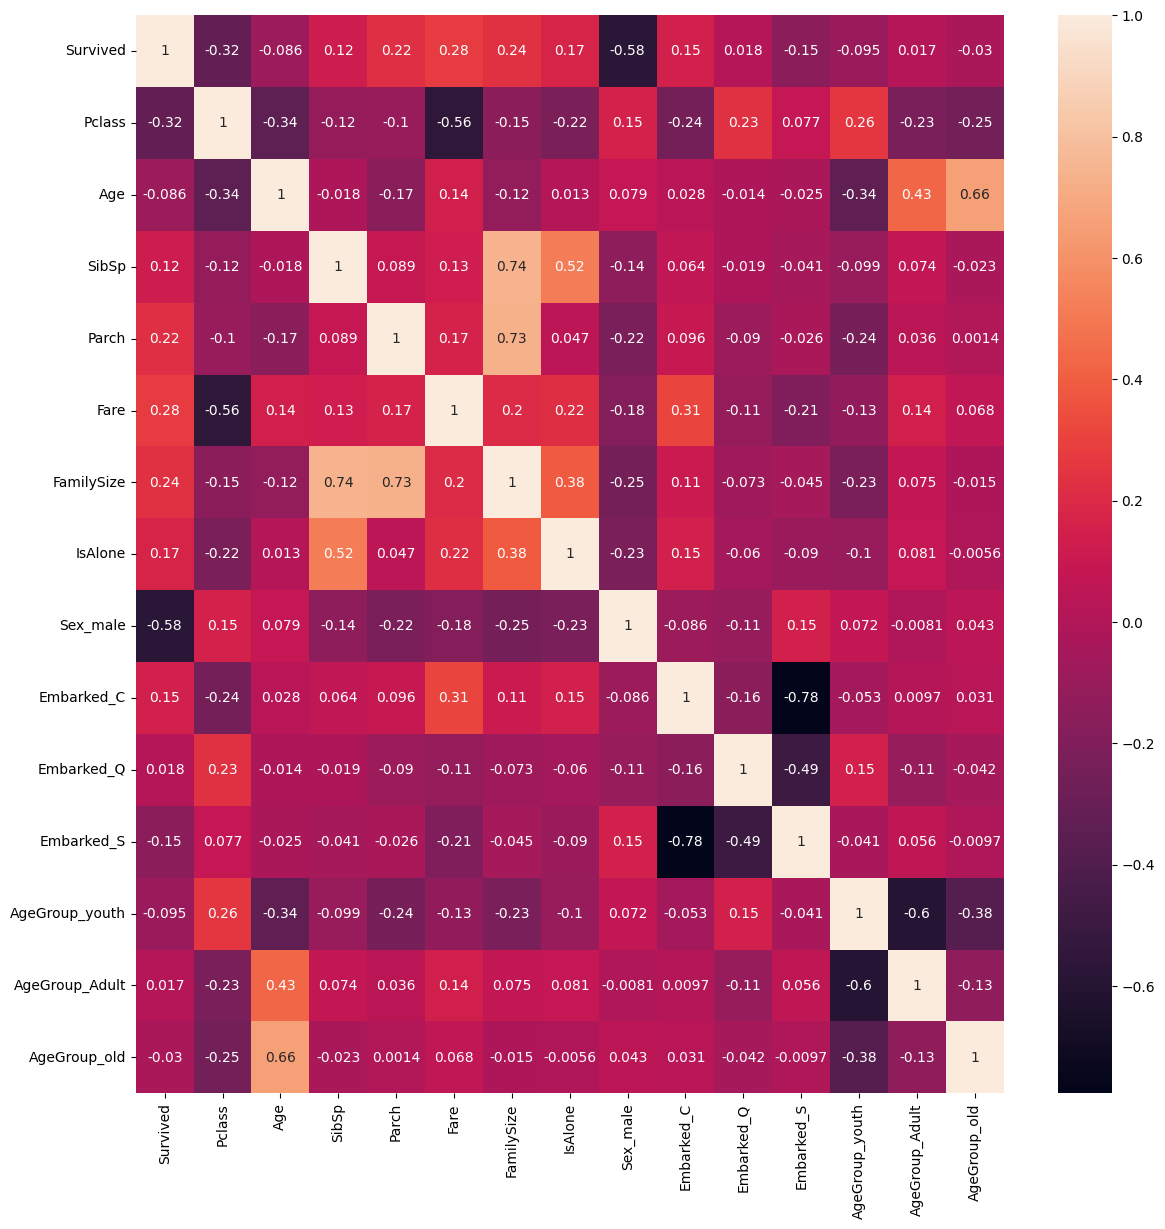

In [42]:
plt.figure(figsize=(14,14))
corr = data_cleaned.corr()
sns.heatmap(corr, annot=True)

##**Data Splitting**

In [43]:
X = data_cleaned.drop(['Survived'], axis = 1)

In [44]:
y = data_cleaned['Survived']

###**Fixing Label imbalance**

In [45]:
#fixing label imbalance

smote = SMOTE(random_state=2023)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [46]:
y_resampled.value_counts()

0    489
1    489
Name: Survived, dtype: int64

In [47]:
#splitting dataset
X_train, X_val, y_train, y_val = train_test_split(
    X_resampled,
    y_resampled,
    test_size=0.2,
    random_state=2023)

##**Feature Scaling/Normalization**

In [48]:
Normalizer = MinMaxScaler()
Normalizer.fit_transform(X_resampled)

array([[1.        , 0.27117366, 0.5       , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.4722292 , 0.5       , ..., 0.        , 1.        ,
        0.        ],
       [1.        , 0.32143755, 0.        , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.61609883, 0.        , ..., 0.        , 0.85028502,
        0.14971498],
       [1.        , 0.36632059, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.36472271, 0.        , ..., 0.95059634, 0.04940366,
        0.        ]])

In [49]:
X_resampled.dtypes

Pclass              int64
Age               float64
SibSp               int64
Parch               int64
Fare              float64
FamilySize          int64
IsAlone             int64
Sex_male          float64
Embarked_C        float64
Embarked_Q        float64
Embarked_S        float64
AgeGroup_youth    float64
AgeGroup_Adult    float64
AgeGroup_old      float64
dtype: object

#**Model**

[LightGBM] [Info] Number of positive: 398, number of negative: 384
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000466 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 410
[LightGBM] [Info] Number of data points in the train set: 782, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.508951 -> initscore=0.035809
[LightGBM] [Info] Start training from score 0.035809
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

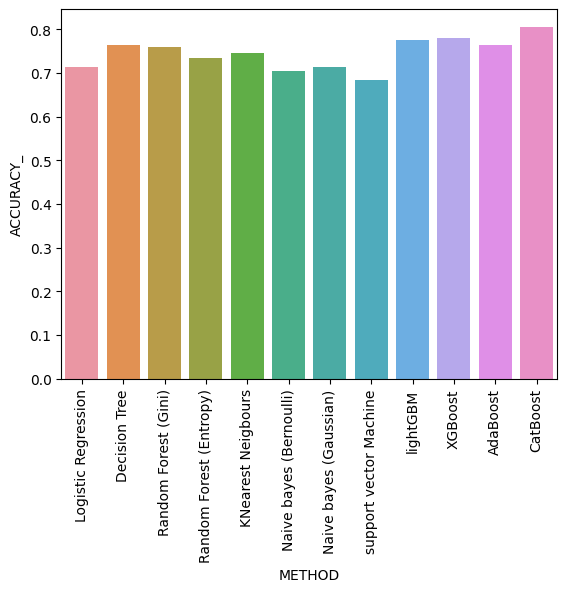

In [50]:
METRIC = []
ACCURACY = []

# <-----logistic regression------>
c_1 = LogisticRegression(random_state=111)
LogReg = c_1.fit(X_train, y_train)
y_pred_LogReg = c_1.predict(X_val)
accuracy_log_reg = accuracy_score(y_val, y_pred_LogReg)


# <-----Decison Tree----->
c_2 = DecisionTreeClassifier(random_state=112)
Tree = c_2.fit(X_train, y_train)
y_pred_Tree = c_2.predict(X_val)
accuracy_Tree = accuracy_score(y_val, y_pred_Tree)


# <-----RandomForest------>
c_3 = RandomForestClassifier(random_state=113, criterion='gini')
RandForGini = c_3.fit(X_train, y_train)
y_pred_RandForGini = c_3.predict(X_val)
accuracy_RandForGini = accuracy_score(y_val, y_pred_RandForGini)

c_4 = RandomForestClassifier(random_state=114, criterion = 'entropy')
RandForEntropy = c_4.fit(X_train, y_train)
y_pred_RandForEntropy = c_4.predict(X_val)
accuracy_RandForEntropy = accuracy_score(y_val, y_pred_RandForEntropy)

# <-----KNN----->
c_5 = KNeighborsClassifier()
Knn = c_5.fit(X_train, y_train)
y_pred_Knn = c_5.predict(X_val)
accuracy_Knn = accuracy_score(y_val, y_pred_Knn)


# <-----Bernoulli Naive Bayes----->
c_6 = BernoulliNB()
Bnb = c_6.fit(X_train, y_train)
y_pred_Bnb = c_6.predict(X_val)
accuracy_Bnb = accuracy_score(y_val, y_pred_Bnb)


# <----- Gaussian Naive Bayes----->
c_7 = GaussianNB()
Gnb = c_7.fit(X_train, y_train)
y_pred_Gnb = c_7.predict(X_val)
accuracy_Gnb = accuracy_score(y_val, y_pred_Gnb)


# <----Support Vector Machine----->
c_8 = SVC(random_state= 118)
svm = c_8.fit(X_train, y_train)
y_pred_svm = c_8.predict(X_val)
accuracy_svm = accuracy_score(y_val, y_pred_svm)


#<------LightGBM------>
c_9 = LGBMClassifier(random_state=119)
lgbm = c_9.fit(X_train, y_train)
y_pred_lgbm = c_9.predict(X_val)
accuracy_lgbm = accuracy_score(y_val, y_pred_lgbm)

# <-----XGBoost------>
c_10 = XGBClassifier()
xgb = c_10.fit(X_train, y_train)
y_pred_xgb = c_10.predict(X_val)
accuracy_xgb = accuracy_score(y_val, y_pred_xgb)

# <-----AdaBoost----->
c_11 = AdaBoostClassifier()
ada = c_11.fit(X_train, y_train)
y_pred_ada = c_11.predict(X_val)
accuracy_ada = accuracy_score(y_val, y_pred_ada)

# <-------Catboost------->
c_12 = CatBoostClassifier()
cat = c_12.fit(X_train, y_train)
y_pred_cat = c_12.predict(X_val)
accuracy_cat = accuracy_score(y_val, y_pred_cat)


# <----------------VOTING---------------->
votes = VotingClassifier(estimators=[
    ('LogReg',LogReg),
    ('Tree', Tree),
    ('RandForGini', RandForGini),
    ('RandForEntropy', RandForEntropy),
    ('Knn', Knn),
    ('Bnb', Bnb),
    ('Gnb', Gnb),
    ('svm', svm),
    ('lgbm', lgbm),
    ('xgb', xgb),
    ('ada', ada),
    ('cat', cat)
    ], flatten_transform=True,
                         voting='hard')

vote_me = votes.fit(X_train, y_train)
pred_vote_me = vote_me.predict(X_val)
accuracy_vote_me  = accuracy_score(y_val, pred_vote_me)



# <-----compile------->
l_1 = ['Logistic Regression', 'Decision Tree', 'Random Forest (Gini)', 'Random Forest (Entropy)', 'KNearest Neigbours', 'Naive bayes (Bernoulli)', 'Naive bayes (Gaussian)',
       'support vector Machine', 'lightGBM', 'XGBoost', 'AdaBoost', 'CatBoost'] #Name of classifiers

l_2 = [
    accuracy_score(y_val, c_1.predict(X_val)),
    accuracy_score(y_val, c_2.predict(X_val)),
    accuracy_score(y_val, c_3.predict(X_val)),
    accuracy_score(y_val, c_4.predict(X_val)),
    accuracy_score(y_val, c_5.predict(X_val)),
    accuracy_score(y_val, c_6.predict(X_val)),
    accuracy_score(y_val, c_7.predict(X_val)),
    accuracy_score(y_val, c_8.predict(X_val)),
    accuracy_score(y_val, c_9.predict(X_val)),
    accuracy_score(y_val, c_10.predict(X_val)),
    accuracy_score(y_val, c_11.predict(X_val)),
    accuracy_score(y_val, c_12.predict(X_val)),
    accuracy_vote_me
]  #list of accuracy

l_3 = [c_1, c_2, c_3, c_4, c_5, c_6, c_7, c_8, c_9, c_10, c_11, c_12]

# <-------Create a DataFrame-------->
df_accuracy = pd.DataFrame({
    'METHOD': l_1,
    'ACCURACY_': l_2[:-1]
})

print(df_accuracy)

# <--------BarChart------->
viz = sns.barplot(x='METHOD', y='ACCURACY_', data=df_accuracy)
viz.set_xticklabels(viz.get_xticklabels(), rotation=90)
plt.show()

In [51]:
for i in l_3:
    print('---- ----    ----    ----    ----',i,'----   ----    ----    ----    ----')
    print(classification_report(y_val, i.predict(X_val)))
    print('*************Confusion Matrix***************')
    print(confusion_matrix(y_val, i.predict(X_val)))

---- ----    ----    ----    ---- LogisticRegression(random_state=111) ----   ----    ----    ----    ----
              precision    recall  f1-score   support

           0       0.74      0.72      0.73       105
           1       0.69      0.70      0.70        91

    accuracy                           0.71       196
   macro avg       0.71      0.71      0.71       196
weighted avg       0.71      0.71      0.71       196

*************Confusion Matrix***************
[[76 29]
 [27 64]]
---- ----    ----    ----    ---- DecisionTreeClassifier(random_state=112) ----   ----    ----    ----    ----
              precision    recall  f1-score   support

           0       0.79      0.76      0.78       105
           1       0.74      0.77      0.75        91

    accuracy                           0.77       196
   macro avg       0.76      0.77      0.76       196
weighted avg       0.77      0.77      0.77       196

*************Confusion Matrix***************
[[80 25]
 [21 70]]


####**Configuration**

In [71]:
CONFIG = {
    'N_ESTIMATOR':[100, 200, 300],
    'MAX_DEPTH': [3, 5,7],
    'LR' : [0.01, 0.001, 0.1],
    'SUB_SAMPLE' : [0.2, 0.5, 0.8],
    'L1_REG': [0.1, 0.25, 0.5],
    'L2_REG' : [0.1, 0.25, 0.5],
    'CV' : 5,
    'BOOST_TYPE': ['gbdt', 'dart', 'goss'],
    'N_LEAVES' : [15, 25, 50, 80],
    'COL_SAMPLE' : [.8, .9, 1],
    'N_ITERATIONS': 10,
    'N_JOBS' : -1,
    'CAT_FEATURES' : [0, 1],
    'N2_LEAF': [1, 2, 3],
    'N1_LEAF': [1, 2, 3],
    'RSM': 0.8,
    'VERBOSE': 1,
    'BORDER_COUNT' : [32, 64, 128],
    'BAG_TEMP': [0.5, 1.0, 1.5],
    'RAND_STRENGHT': [0.5, 1.0, 1.5],
    'BOOT' : ['Bayesian', 'Bernoulli', 'MVS'],
    'MAX_BIN' : [8, 16, 32, 64]
}

###**XGBoost HyperParamter tuning with GridSearchCV**

In [72]:
XGB = XGBClassifier()

GRID_PARAMS = {
    'n_estimators': CONFIG['N_ESTIMATOR'],
    'max_depth': CONFIG['MAX_DEPTH'],
    'learning_rate': CONFIG['LR'],
    'subsample': CONFIG['SUB_SAMPLE'],
    'reg_alpha': CONFIG['L1_REG'],
    'reg_lambda': CONFIG['L2_REG'],
}
GRID_SEARCH = GridSearchCV(estimator=XGB,
                           param_grid = GRID_PARAMS,
                           scoring='accuracy',
                           cv = CONFIG['CV'])

GRID_SEARCH.fit(X_val, y_val)

print("Best Hyperparameters:", GRID_SEARCH.best_params_)
xgb_best_model = GRID_SEARCH.best_estimator_

xgb_pred = xgb_best_model.predict(X_val)

# <------Evaluate the model---->
accuracy = accuracy_score(y_val, xgb_pred)
precision = precision_score(y_val, xgb_pred)
recall = recall_score(y_val, xgb_pred)
f1 = f1_score(y_val, xgb_pred)

# <----classification report------>
print('--------------------------------')
print("Accuracy:", accuracy)
print('--------------------------------')
print("Precision:", precision)
print('--------------------------------')
print("Recall:", recall)
print('-------------------------------')
print("F1 Score:", f1)

Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 300, 'reg_alpha': 0.1, 'reg_lambda': 0.5, 'subsample': 0.8}
--------------------------------
Accuracy: 0.9438775510204082
--------------------------------
Precision: 0.9761904761904762
--------------------------------
Recall: 0.9010989010989011
-------------------------------
F1 Score: 0.937142857142857


###**LightGBM Hyperparamter Tuning with RandomSearchCV**

In [73]:
LGBM = LGBMClassifier()

RAND_PARAMS = {
    'n_estimators': CONFIG['N_ESTIMATOR'],
    'boosting_type' : CONFIG['BOOST_TYPE'],
    'max_depth': CONFIG['MAX_DEPTH'],
    'learning_rate': CONFIG['LR'],
    'subsample': CONFIG['SUB_SAMPLE'],
    'num_leaves' : CONFIG['N_LEAVES'],
    'colsample_bytree' : CONFIG['COL_SAMPLE'],
    'reg_alpha': CONFIG['L1_REG'],
    'reg_lambda': CONFIG['L2_REG'],
}
RAND_SEARCH = RandomizedSearchCV(estimator = LGBM,
                                 param_distributions = RAND_PARAMS,
                                 n_iter = CONFIG['N_ITERATIONS'],
                                 scoring = 'accuracy',
                                 cv = CONFIG['CV'],
                                 n_jobs = CONFIG['N_JOBS'],
                                 random_state = 101)

RAND_SEARCH.fit(X_val, y_val)

print("Best Hyperparameters:", RAND_SEARCH.best_params_)
lgbm_best_model = RAND_SEARCH.best_estimator_

lgbm_pred = lgbm_best_model.predict(X_val)

# <-----Evaluate the model----->
accuracy = accuracy_score(y_val, lgbm_pred)
precision = precision_score(y_val, lgbm_pred)
recall = recall_score(y_val, lgbm_pred)
f1 = f1_score(y_val, lgbm_pred)

# <----classification report------>
print('-------------------------------')
print("Accuracy:", accuracy)
print('--------------------------------')
print("Precision:", precision)
print('--------------------------------')
print("Recall:", recall)
print('--------------------------------')
print("F1 Score:", f1)

[LightGBM] [Info] Number of positive: 91, number of negative: 105
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000114 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 125
[LightGBM] [Info] Number of data points in the train set: 196, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.464286 -> initscore=-0.143101
[LightGBM] [Info] Start training from score -0.143101
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


###**CatBoost HyperParamter tuning**

In [74]:
CATBOOST = CatBoostClassifier()

param_space = {
    'n_estimators': CONFIG['N_ESTIMATOR'],
    'learning_rate': CONFIG['LR'],
    'depth': CONFIG['MAX_DEPTH'],
    'l2_leaf_reg': CONFIG['N2_LEAF'],
    #'border_count': CONFIG['BORDER_COUNT'],
    'bagging_temperature': CONFIG['BAG_TEMP'],
    'random_strength': CONFIG['RAND_STRENGHT'],
    'bootstrap_type': CONFIG['BOOT'],
    'colsample_bylevel': CONFIG['COL_SAMPLE'],
    'max_bin': CONFIG['MAX_BIN']
}

rand_search = RandomizedSearchCV(estimator= CATBOOST,
                                  param_distributions=param_space,
                                  n_iter = 50,
                                  scoring='accuracy',
                                  cv=CONFIG['CV'],
                                  n_jobs=CONFIG['N_JOBS'],
                                  random_state=103)

rand_search.fit(X_val, y_val)

print("Best Hyperparameters:", rand_search.best_params_)
catboost_best_model = rand_search.best_estimator_

catboost_pred = catboost_best_model.predict(X_val)

# <-----Evaluate the model------>
accuracy = accuracy_score(y_val, catboost_pred)
precision = precision_score(y_val, catboost_pred)
recall = recall_score(y_val, catboost_pred)
f1 = f1_score(y_val, catboost_pred)

# <----classification report------>
print('--------------------------------')
print("Accuracy:", accuracy)
print('--------------------------------')
print("Precision:", precision)
print('--------------------------------')
print("Recall:", recall)
print('--------------------------------')
print("F1 Score:", f1)

0:	learn: 0.6594178	total: 780us	remaining: 233ms
1:	learn: 0.6180766	total: 1.97ms	remaining: 294ms
2:	learn: 0.5824944	total: 2.77ms	remaining: 274ms
3:	learn: 0.5646753	total: 3.48ms	remaining: 258ms
4:	learn: 0.5536993	total: 4.31ms	remaining: 254ms
5:	learn: 0.5378101	total: 5.14ms	remaining: 252ms
6:	learn: 0.5234673	total: 6.01ms	remaining: 251ms
7:	learn: 0.5102259	total: 7.15ms	remaining: 261ms
8:	learn: 0.5018595	total: 7.75ms	remaining: 251ms
9:	learn: 0.4938156	total: 8.42ms	remaining: 244ms
10:	learn: 0.4848740	total: 9.42ms	remaining: 247ms
11:	learn: 0.4734067	total: 10.4ms	remaining: 249ms
12:	learn: 0.4666921	total: 11.3ms	remaining: 249ms
13:	learn: 0.4538167	total: 12.4ms	remaining: 253ms
14:	learn: 0.4502797	total: 13.6ms	remaining: 258ms
15:	learn: 0.4467819	total: 14.4ms	remaining: 256ms
16:	learn: 0.4410072	total: 15.1ms	remaining: 252ms
17:	learn: 0.4358161	total: 15.7ms	remaining: 246ms
18:	learn: 0.4277395	total: 16.3ms	remaining: 241ms
19:	learn: 0.4254204	to

##**Model Evaluation**

In [75]:
_cm = confusion_matrix(y_val, xgb_pred)
_cm

array([[103,   2],
       [  9,  82]])

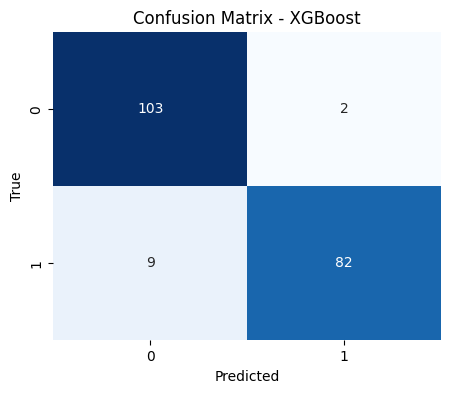

In [76]:
plt.figure(figsize=(5, 4))
sns.heatmap(_cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix - XGBoost')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [77]:
cm_ = confusion_matrix(y_val, lgbm_pred)
cm_

array([[97,  8],
       [11, 80]])

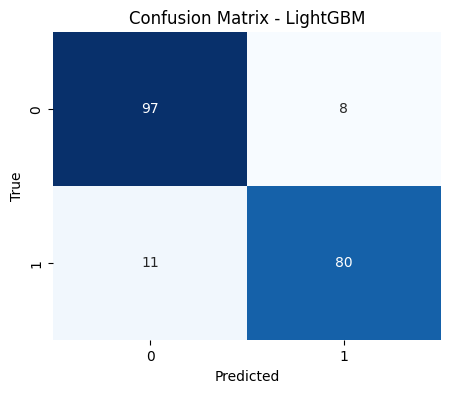

In [78]:
plt.figure(figsize=(5, 4))
sns.heatmap(cm_, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix - LightGBM')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [79]:
cm = confusion_matrix(y_val, catboost_pred)
cm

array([[104,   1],
       [  4,  87]])

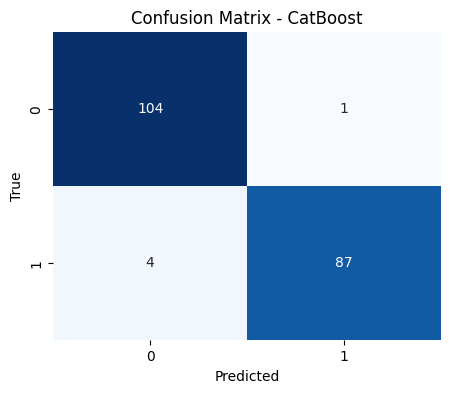

In [80]:
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix - CatBoost')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

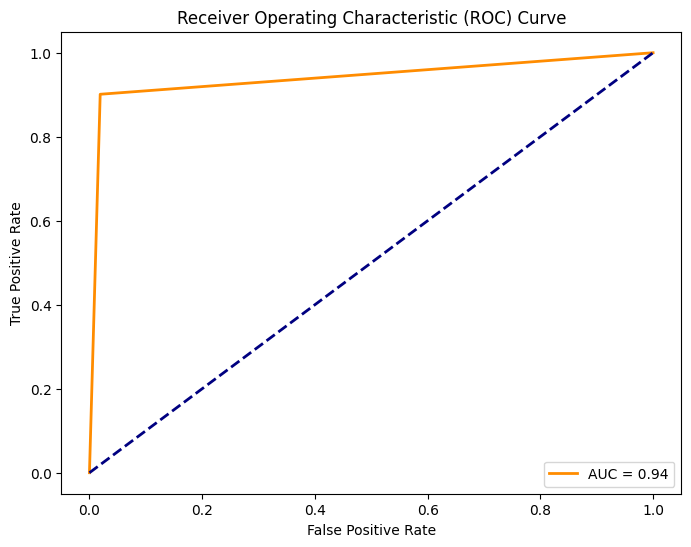

AUC Score: 0.94


In [81]:
# Make predictions on the val set
y_pred_prob = xgb_best_model.predict(X_val)
y_pred = (y_pred_prob > 0.5).astype(int)

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_val, y_pred_prob)

# Calculate AUC score
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Print AUC score
print(f'AUC Score: {roc_auc:.2f}')

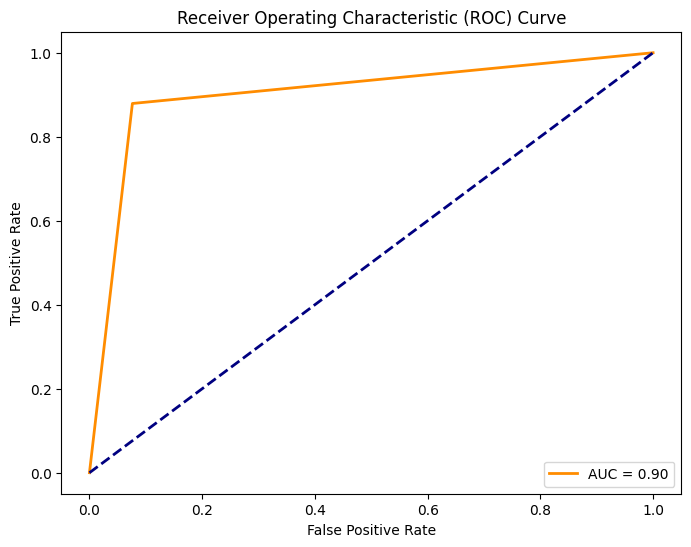

AUC Score: 0.90


In [82]:
# Make predictions on the val set
y_pred_prob = lgbm_best_model.predict(X_val)
y_pred = (y_pred_prob > 0.5).astype(int)

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_val, y_pred_prob)

# Calculate AUC score
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Print AUC score
print(f'AUC Score: {roc_auc:.2f}')

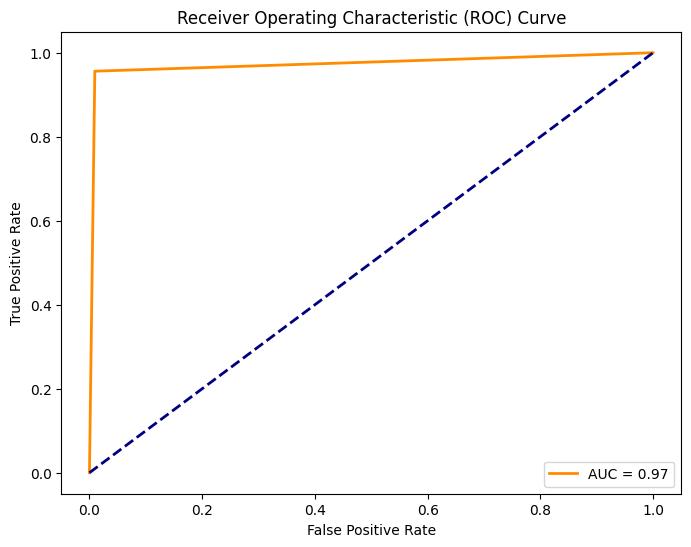

AUC Score: 0.97


In [83]:
# Make predictions on the val set
y_pred_prob = catboost_best_model.predict(X_val)
y_pred = (y_pred_prob > 0.5).astype(int)

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_val, y_pred_prob)

# Calculate AUC score
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Print AUC score
print(f'AUC Score: {roc_auc:.2f}')

##**Model Ensemble**

In [89]:
models = [('XGBoost', XGB), ('LightGBM', LGBM), ('CatBoost', CATBOOST)]

ensemble_model = VotingClassifier(estimators = models, voting='soft')

ensemble_model.fit(X_val, y_val)

ensemble_pred = ensemble_model.predict(X_val)

# <-----Evaluate the ensemble model---->
ensemble_accuracy = accuracy_score(y_val, ensemble_pred)
print(f'Ensemble Accuracy: {ensemble_accuracy}')

[LightGBM] [Info] Number of positive: 91, number of negative: 105
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000090 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 125
[LightGBM] [Info] Number of data points in the train set: 196, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.464286 -> initscore=-0.143101
[LightGBM] [Info] Start training from score -0.143101
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


Confusion Matrix:
 [[104   1]
 [  4  87]]


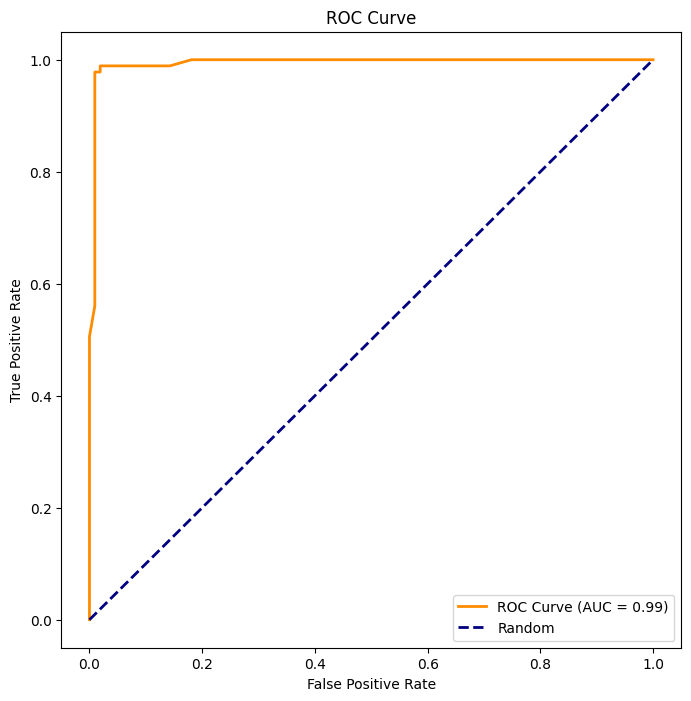

In [90]:
# Get predicted probabilities for each class (assuming binary classification)
ensemble_probab = ensemble_model.predict_proba(X_val)[:, 1]

# Convert probabilities to binary predictions based on a threshold (e.g., 0.5)
ensemble_predictions_binary = (ensemble_probab > 0.5).astype(int)

# <-----Confusion Matrix----->
conf_matrix = confusion_matrix(y_val, ensemble_predictions_binary)
print("Confusion Matrix:\n", conf_matrix)

# <---ROC----->
fpr, tpr, thresholds = roc_curve(y_val, ensemble_probab)
roc_auc = auc(fpr, tpr)

# <---- ROC Curve ---->
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

##**Testing**

In [92]:
# ensemble_test_probab = ensemble_model.predict_proba(X_test)[:, 1]

# ensemble_test_pred_binary = (ensemble_test_probab > 0.5).astype(int)

# # Evaluate performance on the test set
# accuracy_test = accuracy_score(y_test, ensemble_test_pred_binary)
# precision_test = precision_score(y_test, ensemble_test_pred_binary)
# recall_test = recall_score(y_test, ensemble_test_pred_binary)
# f1_test = f1_score(y_test, ensemble_test_pred_binary)

# # <-----results-------->
# print("Test Set Performance:")
# print(f"Accuracy: {accuracy_test:.4f}")
# print(f"Precision: {precision_test:.4f}")
# print(f"Recall: {recall_test:.4f}")
# print(f"F1 Score: {f1_test:.4f}")

# # Compare with Validation Set Performance
# print("\nComparison with Validation Set:")
# print(f"Validation Accuracy: {accuracy_val:.4f}")
# print(f"Validation Precision: {precision_val:.4f}")
# print(f"Validation Recall: {recall_val:.4f}")
# print(f"Validation F1 Score: {f1_val:.4f}")

In [94]:
# y_val_pred = ensemble_model.predict(X_val[:50])
# y_test_pred = ensemble_model.predict(X_test[:50])

# indices = np.arange(50)

# plt.figure(figsize=(10, 6))
# bar_width = 0.35

# plt.bar(indices, y_val_pred[:50], bar_width, label='Validation Set')
# plt.bar(indices + bar_width, y_test_pred[:50], bar_width, label='Test Set')

# plt.xlabel('Sample Index')
# plt.ylabel('Predicted Labels')
# plt.title('Comparison of Predicted Labels for the First 50 Samples')
# plt.xticks(indices + bar_width / 2, indices)
# plt.legend()

# plt.show()